In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [5]:
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [6]:
data = diabetes_dataset['data']
target = diabetes_dataset['target']

In [9]:
# Normalize the target data (this will make clearer training curves)
target = (target - target.mean(axis=0)) / target.std()
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(397, 10)
(45, 10)
(397,)
(45,)


### Train a Feedforward Neural Network Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

In [14]:
model = get_model()

In [15]:
# Print the Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [16]:
# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [17]:
# Train the Model, with some of the data reserved for validation
history = model.fit(X_train, y_train, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 0.9665 - mae: 0.8417 - val_loss: 0.9944 - val_mae: 0.8796
Epoch 2/100
6/6 - 0s - loss: 0.8765 - mae: 0.8041 - val_loss: 0.8381 - val_mae: 0.7989
Epoch 3/100
6/6 - 0s - loss: 0.6994 - mae: 0.7240 - val_loss: 0.5817 - val_mae: 0.6435
Epoch 4/100
6/6 - 0s - loss: 0.5644 - mae: 0.6205 - val_loss: 0.4782 - val_mae: 0.5366
Epoch 5/100
6/6 - 0s - loss: 0.4927 - mae: 0.5681 - val_loss: 0.5279 - val_mae: 0.5899
Epoch 6/100
6/6 - 0s - loss: 0.5102 - mae: 0.5757 - val_loss: 0.5643 - val_mae: 0.5939
Epoch 7/100
6/6 - 0s - loss: 0.4930 - mae: 0.5618 - val_loss: 0.5245 - val_mae: 0.5565
Epoch 8/100
6/6 - 0s - loss: 0.5296 - mae: 0.5870 - val_loss: 0.4590 - val_mae: 0.5586
Epoch 9/100
6/6 - 0s - loss: 0.5167 - mae: 0.5620 - val_loss: 0.5568 - val_mae: 0.6058
Epoch 10/100
6/6 - 0s - loss: 0.4823 - mae: 0.5795 - val_loss: 0.4618 - val_mae: 0.5607
Epoch 11/100
6/6 - 0s - loss: 0.4656 - mae: 0.5476 - val_loss: 0.4533 - val_mae: 0.5307
Epoch 12/100
6/6 - 0s - loss: 0.4498 - ma

Epoch 95/100
6/6 - 0s - loss: 0.0338 - mae: 0.1318 - val_loss: 0.4919 - val_mae: 0.5354
Epoch 96/100
6/6 - 0s - loss: 0.0328 - mae: 0.1268 - val_loss: 0.5077 - val_mae: 0.5423
Epoch 97/100
6/6 - 0s - loss: 0.0321 - mae: 0.1258 - val_loss: 0.5290 - val_mae: 0.5415
Epoch 98/100
6/6 - 0s - loss: 0.0340 - mae: 0.1354 - val_loss: 0.5393 - val_mae: 0.5418
Epoch 99/100
6/6 - 0s - loss: 0.0348 - mae: 0.1372 - val_loss: 0.5392 - val_mae: 0.5443
Epoch 100/100
6/6 - 0s - loss: 0.0323 - mae: 0.1305 - val_loss: 0.5399 - val_mae: 0.5438


In [18]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 498us/step - loss: 0.7657 - mae: 0.6382


[0.7657392621040344, 0.638214647769928]

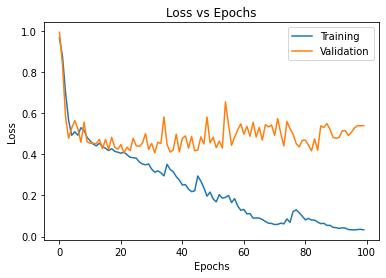

In [19]:
#### Plot the learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()